In [1]:
pip install qutip

Note: you may need to restart the kernel to use updated packages.


In [2]:
from qutip import *
import numpy as np
import math
from scipy.stats import unitary_group
import matplotlib.pyplot as plt
import matplotlib
import numpy.linalg as la
import itertools
from tqdm import tqdm
from scipy.linalg import block_diag
from scipy.optimize import root
from scipy.optimize import minimize
from IPython.display import display
from tqdm.notebook import tnrange
import warnings
warnings.filterwarnings('ignore')

In [3]:
def ham_energies(N):
    energies = []
    for i in range(N+1):
        energies+=([i]*math.comb(N, i))
    return energies

##################################################################################


def free_ham(N):
    ham0 = fock_dm(2,1)
    free_ham = 0
    for i in range(N):
        ham = [qeye(2)]*N
        ham[i] = ham0
        free_ham += tensor(ham)
    
    return free_ham

##################################################################################


def int_ham(N):
    int_ham = 0
    for i in range(N):
        ham = [qeye(2)]*N
        if i==N-1:
            ham[i] = sigmax()
            ham[0] = sigmax()
        else:
            ham[i] = sigmax()
            ham[i+1] = sigmax()

        int_ham += tensor(ham)
    
    return int_ham

##################################################################################


def spin_ham(N, J):
    return free_ham(N)+J*int_ham(N)

##################################################################################


def min_energy(state):
    N = len(state.dims[0])
    eigenvalues, eigenstates = state.eigenstates()
    sorted_eigen = sorted(eigenvalues, reverse=True)
    energies = ham_energies(N)
        
    return np.dot(sorted_eigen, energies)

##################################################################################


def ergotropy(state):
    N = len(state.dims[0])
    return (state*free_ham(N)).tr()-min_energy(state)

##################################################################################


def energy(state):
    N = len(state.dims[0])
    return (state*free_ham(N)).tr()


##################################################################################

import itertools
from qutip import *

# Assuming `energy(state)` function is already defined

def calc_mean_energy(state, N, k):
    """
    Calculate the mean energy over all possible k-qubit bipartitions of the N-qubit system.
    
    Parameters:
    - state: The N-qubit density matrix.
    - N: The total number of qubits.
    - k: The number of qubits in each bipartition.
    
    Returns:
    - The average energy over all bipartitions.
    """
    numbers = [i for i in range(N)]
    combinations = list(itertools.combinations(numbers, k))

    total_energy = 0
    for comb in combinations:
        marginal_state = state.ptrace(comb)
        total_energy += energy(marginal_state)
    
    return total_energy / len(combinations)


##################################################################################
 
def free_energy(state,T):
    N = len(state.dims[0])
    return (state*free_ham(N)).tr()- T*entropy_vn(state)


##################################################################################


def calc_mean_ergotropy(state, N, k):
    numbers = [i for i in range(N)]
    combinations = list(itertools.combinations(numbers, k))

    erg = 0
    for comb in combinations:
        marginal_state = state.ptrace(comb)
        erg += ergotropy(marginal_state)
    
    return erg/len(combinations)



##################################################################################

def calc_mean_entropy(state, N, k):
    numbers = [i for i in range(N)]
    combinations = list(itertools.combinations(numbers, k))

    ent = 0
    for comb in combinations:
        marginal_state = state.ptrace(comb)
        ent += entropy_vn(marginal_state)
    
    return ent/len(combinations)

##################################################################################



def dist_ergotropy(state, N, k):
    numbers = [i for i in range(N)]
    combinations = list(itertools.combinations(numbers, k))

    erg = []
    for comb in combinations:
        marginal_state = state.ptrace(comb)
        erg.append(ergotropy(marginal_state))
    
    return erg

##################################################################################


def random_vector(dim):
    vector = []
    norm = 0 
    for i in range(dim):
        c = np.random.rand() + 1j * np.random.rand()
        norm += abs(c)**2
        vector.append(c)
    return np.array(vector)/np.sqrt(norm)

##################################################################################


def random_product_state(N):
    state = []
    for i in range(N):
        state.append(Qobj(random_vector(2)))
        
    return(tensor(state))


##################################################################################

def random_total_state(N):
    state = Qobj(random_vector(2**N))
    state.dims = [[2]*N, [1]*N]
    return state

##################################################################################


def calc_temp(state):
    p1 = state.diag()[1]
    p0 = state.diag()[0]
    
    return 1/np.log(p0/p1)

##################################################################################


def calc_temp1(state_dm):
    """
    Calculate the temperature based on the diagonal elements of a density matrix.
    """
    diag_elements = state_dm.diag()  # Get the diagonal elements of the density matrix
    
    if len(diag_elements) < 2:
        raise ValueError("Density matrix must have at least two diagonal elements.")
    
    p1 = diag_elements[1]
    p0 = diag_elements[0]
    
    if p0 == 0 or p1 == 0:
        raise ValueError("Diagonal elements cannot be zero for temperature calculation.")
    
    return 1 / np.log(p0 / p1)


##################################################################################


def calc_mean_temp(state, N):
    
    sum_temp = 0
    for i in range(N):
        partial_state = state.ptrace(i)
        sum_temp += calc_temp(partial_state)
        
    return sum_temp/N

##################################################################################


def calc_mean_free_energy(state, T, N, k):
    numbers = [i for i in range(N)]
    combinations = list(itertools.combinations(numbers, k))

    sum_free_energy = 0
    for comb in combinations:
        marginal_state = state.ptrace(comb)
        sum_free_energy += free_energy(marginal_state,T)
    
    return sum_free_energy/len(combinations)

##################################################################################


def calc_mean_min_energy(state, N, k):
    numbers = [i for i in range(N)]
    combinations = list(itertools.combinations(numbers, k))

    sum_min_energy = 0
    for comb in combinations:
        marginal_state = state.ptrace(comb)
        sum_min_energy += min_energy(marginal_state)
        
    return sum_min_energy/len(combinations)

##################################################################################


def calc_mean_energy(state, N, k):
    numbers = [i for i in range(N)]
    combinations = list(itertools.combinations(numbers, k))

    sum_energy = 0
    for comb in combinations:
        marginal_state = state.ptrace(comb)
        sum_energy += energy(marginal_state)
    
    return sum_energy/len(combinations)

##################################################################################


def calc_mean_entropy(state, N, k):
    numbers = [i for i in range(N)]
    combinations = list(itertools.combinations(numbers, k))

    sum_entropy = 0
    for comb in combinations:
        marginal_state = state.ptrace(comb)
        sum_entropy += entropy_vn(marginal_state)
    
    return sum_entropy/len(combinations)

##################################################################################


def calc_partition(T, k):
    partition = 0
    for energy in ham_energies(k):
        partition += np.exp(-energy/T)
    return partition

##################################################################################


def calc_gibbs(T, k):
    H = free_ham(k)
    state = Qobj(-H/T).expm()
    return state/state.tr()

##################################################################################


def g(T,entropy, k):
        return T*(entropy - np.log(calc_partition(T,k)))

##################################################################################


def find_temp(entropy, k, x0 = 1, bounds = [(10**(-5), 1)]):
    result = minimize(g, x0, args=(entropy, k), bounds=bounds)
    return result.x[0]

##################################################################################


def calc_mean_non_eq_free_energy(state, N, k):
    mean_entropy = calc_mean_entropy(state, N, k)
    T = find_temp(mean_entropy, k)
    return calc_mean_energy(state, N, k) - T*mean_entropy + T*np.log(calc_partition(T, k))

In [4]:
def random_vector(dim):
    vector = []
    norm = 0 
    for i in range(dim):
        c = np.random.rand() + 1j * np.random.rand()
        norm += abs(c)**2
        vector.append(c)
    return np.array(vector)/np.sqrt(norm)

def random_total_state(N):
    state = Qobj(random_vector(2**N))
    state.dims = [[2]*N, [1]*N]
    return state

def density_matrix(state):
    """
    Convert a pure state (ket) into a density matrix (rho = |psi><psi|).
    
    Parameters:
    - state: A pure state Qobj (ket).
    
    Returns:
    - The corresponding density matrix (Qobj).
    """
    return state.proj()  # Returns the density matrix as |psi⟩⟨psi|


In [5]:
N = 10 # Total number of qubits
k = 2   # Bipartition size (e.g., 2-qubit bipartitions)
E1 = 0
s1=random_total_state(N)
#d1=density_matrix(s1)

state = [fock(2, 0)] * N  # All qubits initially in the ground state
state[0] = fock(2, 1)     # Set the first qubit in the excited state

# Tensor product of all qubit states to form a 12-qubit state
initial_state = tensor(state)

# Create the density matrix (ρ = |ψ⟩⟨ψ|)
d1 = initial_state.proj()
#g1=calc_gibbs(T, k)


qubits = list(range(N))
bipartitions = list(itertools.combinations(qubits, k))

# Calculate energy for each bipartition's Gibbs state
for bipartition in bipartitions:
    # Gibbs state for the bipartition
    marginal_state = d1.ptrace(bipartition)
    entropy_value = entropy_vn(marginal_state)  # Entropy for each bipartite Gibbs state
    #tempa = g(T, entropy_value, k)
    temp= find_temp(entropy_value, k, x0 = 1, bounds = [(10**(-5), 1)])
    gibbs_state = calc_gibbs(temp, k)
    # Calculate the energy for the bipartite Gibbs state
    energy_value = energy(gibbs_state)/len(bipartitions)
    
    # Add the energy of this bipartition to the total energy
    E1 += energy_value
E1



Ent1=calc_mean_entropy(d1, N, k)
mean_energy = calc_mean_energy(d1, N, k)
T= find_temp(Ent1, k, x0 = 1, bounds = [(10**(-5), 1)])

F2=calc_mean_non_eq_free_energy(d1, N, k)
R2=calc_mean_ergotropy(d1, N, k)

#T*Ent1<=E1
np.abs(R2)<=np.abs(F2)


True

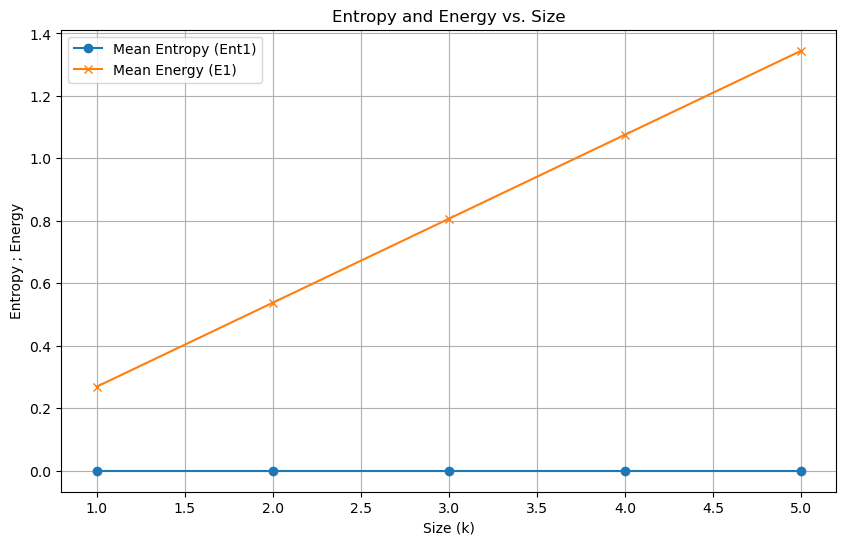

In [6]:
import matplotlib.pyplot as plt
import itertools
import numpy as np

# Initialize parameters
N = 5  # Total number of qubits
k_values = range(1, N+1)  # Bipartition size will vary from 1 to N

# Lists to store entropy and energy values for each k
Ent1_values = []
E1_values = []

# Loop over different bipartition sizes k
for k in k_values:
    E1 = 0
    s1 = random_total_state(N)  # Generate random total state
    state = [fock(2, 0)] * N  # All qubits initially in the ground state
    state[0] = fock(2, 1)     # Set the first qubit in the excited state
    # Tensor product of all qubit states to form a 12-qubit state
    initial_state = tensor(state)
    # Create the density matrix (ρ = |ψ⟩⟨ψ|)
    d1 = initial_state.proj()
    #d1 = density_matrix(s1)  # Get density matrix

    qubits = list(range(N))
    bipartitions = list(itertools.combinations(qubits, k))

    # Calculate energy for each bipartition's Gibbs state
    for bipartition in bipartitions:
        # Gibbs state for the bipartition
        marginal_state = d1.ptrace(bipartition)
        entropy_value = entropy_vn(marginal_state)  # Entropy for each bipartition's Gibbs state

        # Find temperature for the Gibbs state based on entropy
        temp = find_temp(entropy_value, k, x0=1, bounds=[(10**(-5), 1)])
        gibbs_state = calc_gibbs(temp, k)

        # Calculate the energy for the bipartition's Gibbs state
        energy_value = energy(gibbs_state) / len(bipartitions)

        # Add the energy of this bipartition to the total energy
        E1 += energy_value

    # Store the total energy for this k
    E1_values.append(E1)

    # Calculate mean entropy for this k
    Ent1 = calc_mean_entropy(d1, N, k)
    Ent1_values.append(Ent1)
    

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, Ent1_values, label='Mean Entropy (Ent1)', marker='o')
plt.plot(k_values, E1_values, label='Mean Energy (E1)', marker='x')
plt.xlabel('Size (k)')
plt.ylabel('Entropy ; Energy')
plt.title('Entropy and Energy vs. Size')
plt.grid(True)
plt.legend()
plt.show()


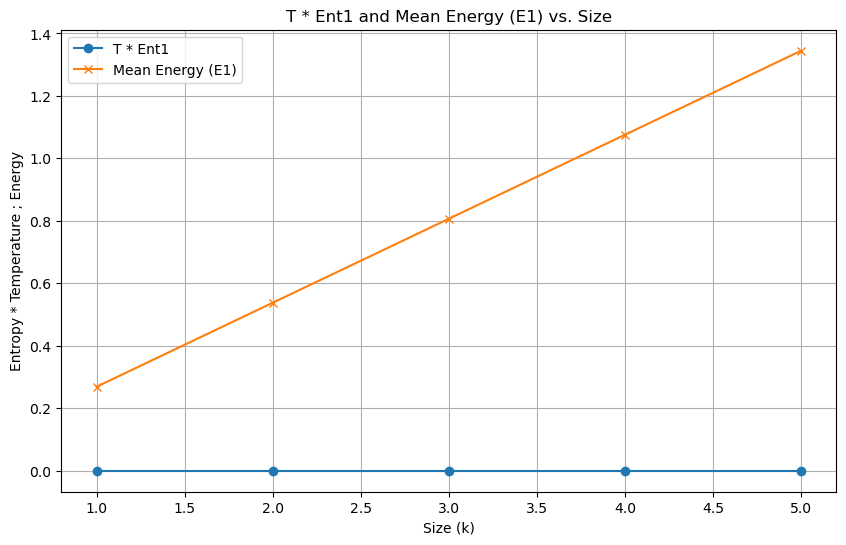

In [7]:
import matplotlib.pyplot as plt
import itertools
import numpy as np

# Initialize parameters
N = 5  # Total number of qubits
k_values = range(1, N+1)  # Bipartition size will vary from 1 to N

# Lists to store entropy and energy values for each k
Ent1_values = []
E1_values = []
T_values = []

# Loop over different bipartition sizes k
for k in k_values:
    E1 = 0
    s1 = random_total_state(N)  # Generate random total state
    state = [fock(2, 0)] * N  # All qubits initially in the ground state
    state[0] = fock(2, 1)     # Set the first qubit in the excited state
    # Tensor product of all qubit states to form a 12-qubit state
    initial_state = tensor(state)
    # Create the density matrix (ρ = |ψ⟩⟨ψ|)
    d1 = initial_state.proj()
    #d1 = density_matrix(s1)  # Get density matrix

    qubits = list(range(N))
    bipartitions = list(itertools.combinations(qubits, k))

    # Calculate mean entropy for this k
    Ent1 = calc_mean_entropy(d1, N, k)
    Ent1_values.append(Ent1)

    # Find the temperature based on entropy
    T = find_temp(Ent1, k, x0=1, bounds=[(10**(-5), 1)])
    T_values.append(T)

    # Calculate energy for each bipartition's Gibbs state
    for bipartition in bipartitions:
        # Gibbs state for the bipartition
        marginal_state = d1.ptrace(bipartition)
        entropy_value = entropy_vn(marginal_state)  # Entropy for each bipartition's Gibbs state

        # Recalculate the temperature based on this bipartition's entropy (optional, if needed)
        temp = find_temp(entropy_value, k, x0=1, bounds=[(10**(-5), 1)])

        # Calculate Gibbs state for the bipartition at the calculated temperature
        gibbs_state = calc_gibbs(temp, k)

        # Calculate the energy for the bipartition's Gibbs state
        energy_value = energy(gibbs_state) / len(bipartitions)

        # Add the energy of this bipartition to the total energy
        E1 += energy_value

    # Store the total energy for this k
    E1_values.append(E1)


T_Ent1_product = np.multiply(T_values, Ent1_values)

# Plotting the results for Ent1_values * T_values and E1_values vs k
plt.figure(figsize=(10, 6))

# Plot T * Ent1
plt.plot(k_values, T_Ent1_product, label='T * Ent1', marker='o')

# Plot E1
plt.plot(k_values, E1_values, label='Mean Energy (E1)', marker='x')

# Labels and formatting
plt.xlabel('Size (k)')
plt.ylabel('Entropy * Temperature ; Energy')
plt.title('T * Ent1 and Mean Energy (E1) vs. Size')
plt.grid(True)
plt.legend()
plt.show()


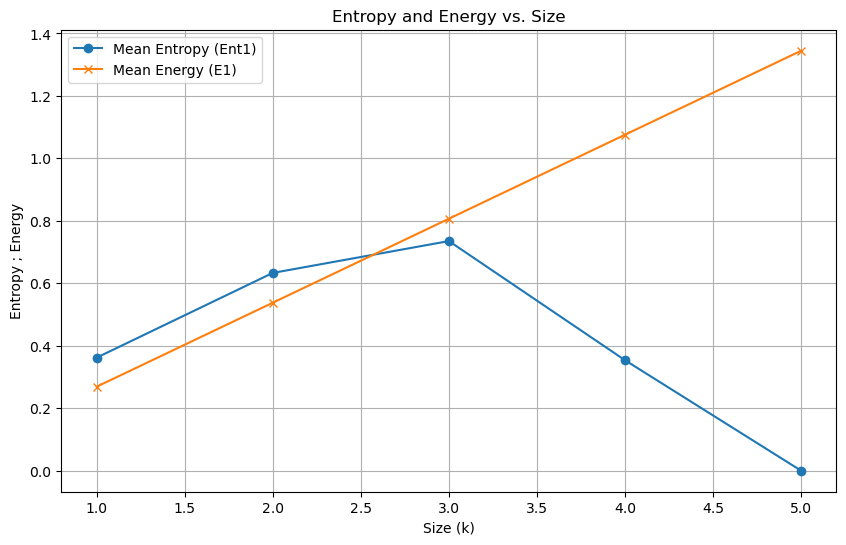

In [8]:
import matplotlib.pyplot as plt
import itertools
import numpy as np

# Initialize parameters
N = 5  # Total number of qubits
k_values = range(1, N+1)  # Bipartition size will vary from 1 to N

# Lists to store entropy and energy values for each k
Ent1_values = []
E1_values = []

# Loop over different bipartition sizes k
for k in k_values:
    E1 = 0
    s1 = random_total_state(N)  # Generate random total state
    d1 = density_matrix(s1)  # Get density matrix

    qubits = list(range(N))
    bipartitions = list(itertools.combinations(qubits, k))

    # Calculate energy for each bipartition's Gibbs state
    for bipartition in bipartitions:
        # Gibbs state for the bipartition
        marginal_state = d1.ptrace(bipartition)
        entropy_value = entropy_vn(marginal_state)  # Entropy for each bipartition's Gibbs state

        # Find temperature for the Gibbs state based on entropy
        temp = find_temp(entropy_value, k, x0=1, bounds=[(10**(-5), 1)])
        gibbs_state = calc_gibbs(temp, k)

        # Calculate the energy for the bipartition's Gibbs state
        energy_value = energy(gibbs_state) / len(bipartitions)

        # Add the energy of this bipartition to the total energy
        E1 += energy_value

    # Store the total energy for this k
    E1_values.append(E1)

    # Calculate mean entropy for this k
    Ent1 = calc_mean_entropy(d1, N, k)
    Ent1_values.append(Ent1)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, Ent1_values, label='Mean Entropy (Ent1)', marker='o')
plt.plot(k_values, E1_values, label='Mean Energy (E1)', marker='x')
plt.xlabel('Size (k)')
plt.ylabel('Entropy ; Energy')
plt.title('Entropy and Energy vs. Size')
plt.grid(True)
plt.legend()
plt.show()


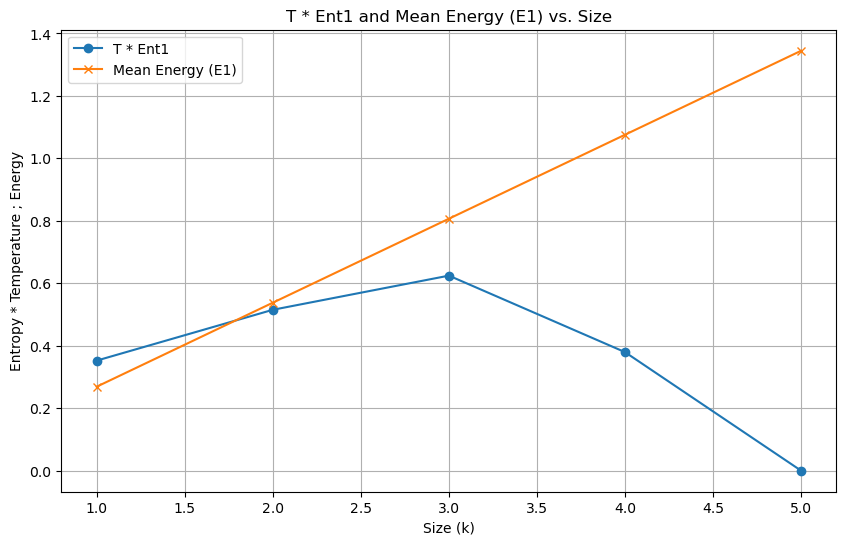

In [9]:
import matplotlib.pyplot as plt
import itertools
import numpy as np

# Initialize parameters
N = 5  # Total number of qubits
k_values = range(1, N+1)  # Bipartition size will vary from 1 to N

# Lists to store entropy and energy values for each k
Ent1_values = []
E1_values = []
T_values = []

# Loop over different bipartition sizes k
for k in k_values:
    E1 = 0
    s1 = random_total_state(N)  # Generate random total state
    d1 = density_matrix(s1)  # Get density matrix

    qubits = list(range(N))
    bipartitions = list(itertools.combinations(qubits, k))

    # Calculate mean entropy for this k
    Ent1 = calc_mean_entropy(d1, N, k)
    Ent1_values.append(Ent1)

    # Find the temperature based on entropy
    T = find_temp(Ent1, k, x0=1, bounds=[(10**(-5), 1)])
    T_values.append(T)

    # Calculate energy for each bipartition's Gibbs state
    for bipartition in bipartitions:
        # Gibbs state for the bipartition
        marginal_state = d1.ptrace(bipartition)
        entropy_value = entropy_vn(marginal_state)  # Entropy for each bipartition's Gibbs state

        # Recalculate the temperature based on this bipartition's entropy (optional, if needed)
        temp = find_temp(entropy_value, k, x0=1, bounds=[(10**(-5), 1)])

        # Calculate Gibbs state for the bipartition at the calculated temperature
        gibbs_state = calc_gibbs(temp, k)

        # Calculate the energy for the bipartition's Gibbs state
        energy_value = energy(gibbs_state) / len(bipartitions)

        # Add the energy of this bipartition to the total energy
        E1 += energy_value

    # Store the total energy for this k
    E1_values.append(E1)


T_Ent1_product = np.multiply(T_values, Ent1_values)

# Plotting the results for Ent1_values * T_values and E1_values vs k
plt.figure(figsize=(10, 6))

# Plot T * Ent1
plt.plot(k_values, T_Ent1_product, label='T * Ent1', marker='o')

# Plot E1
plt.plot(k_values, E1_values, label='Mean Energy (E1)', marker='x')

# Labels and formatting
plt.xlabel('Size (k)')
plt.ylabel('Entropy * Temperature ; Energy')
plt.title('T * Ent1 and Mean Energy (E1) vs. Size')
plt.grid(True)
plt.legend()
plt.show()
